# Ein einfaches Beispiel für ein JupyterLab Notebook
Dieses interaktive Skript baut eine HTTP-Verbindung auf und analysiert die Antwort, die aus JSON-Daten besteht.

In [1]:
import requests
# hole Informationen zur eigenen öffentlichen IP-Adresse
data = requests.get('https://ipinfo.io')
print('Status Code: {}'.format(data.status_code))
print('Antwort des Servers: ', data.text)

Status Code: 200
Antwort des Servers:  {
  "ip": "91.184.179.186",
  "hostname": "186-179-184-091.ip-addr.vsenet.de",
  "city": "Bramsche",
  "region": "Lower Saxony",
  "country": "DE",
  "loc": "52.4088,7.9729",
  "org": "AS9063 VSE NET GmbH",
  "postal": "49565",
  "timezone": "Europe/Berlin",
  "readme": "https://ipinfo.io/missingauth"
}


In [2]:
json_data = data.json()
# extrahiere die öffentliche IP-Adresse und die zugeordnete Stadt
ip = json_data['ip']
city = json_data['city']
print(f'{ip} kommt aus {city}')

91.184.179.186 kommt aus Bramsche


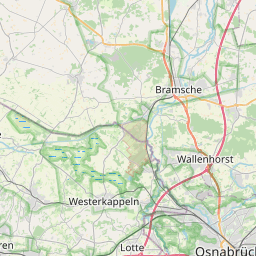

In [3]:
import math

# Source: https://stackoverflow.com/a/28530369/18073555

def deg2num(lat_deg, lon_deg, zoom):
    """Calculate tile numbers for OpenStreetMap images from given geo coordinates."""
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n)
    return (xtile, ytile)

def get_osm_image(coordinates):
    coordinates = [float(x) for x in coordinates]
    x, y = deg2num(coordinates[0], coordinates[1], 10)
    url = 'http://a.tile.openstreetmap.org/10/{}/{}.png'.format(x, y)
    image = requests.get(url)
    return image.content

from IPython.display import Image, display
# extrahiere die Geo-Koordinaten aus der Server-Antwort und hole ein Bild aus der OpenStreetMap
image = get_osm_image(json_data['loc'].split(','))
display(Image(image))